Define    
f1(x,y) =x^2+ 0.0001y^2,    
f2(x,y) =(x−y)^2/2+ 0.0001(x+y)^2/2.     
In this problem you will minimize these two functions using four optimizers:  GD, GD withmomentum 0.9, RMSProp, and Adam with β1= 0.9 and β2= 0.999. For each, use learning rate 10−3. When optimizing f1, initialize at(1,1). When optimizing f2, initialize at(√2,0).

Numerically solve the 8 optimization problems described above. Plot the objective as afunction of iteration count.  You are encouraged to use the built-in optimizers for these algorithms in PyTorch.

In [1]:
import math

import torch
import torch.optim as optim 
import torch.nn as nn

from matplotlib import pyplot as plt

In [2]:
def f1(x, y):
    z = x*x + (0.0001 * y*y)
    return z
    
    
def f2(x, y):
    z = ((x-y)**2)/2.0 
    z += 0.0001 * ((x+y)**2/2.0)
    return z


def optim_func(x, y, objective_func, optimizer, max_iter=2000, title='GD'):
    losses = []
    for i in range(max_iter):
        optimizer.zero_grad()
        z = objective_func(x, y)
        z.backward()
        optimizer.step()
        losses.append(z.item())
        
    return losses

In [3]:
def f1_variables():
    x = torch.Tensor([1])
    x.requires_grad=True
    y = torch.Tensor([1])
    y.requires_grad=True
    
    return x, y


lr = 1e-3

x, y = f1_variables()
gd = optim.SGD([x, y], lr=lr)
gd_func = optim_func(x, y, f1, gd, title='GD')

x, y = f1_variables()
gd_momentum = optim.SGD([x, y], lr=lr, momentum=0.9)
gd_momentum_func = optim_func(x, y, f1, gd_momentum, title='GD momentum')

x, y = f1_variables()
rmsprop = optim.RMSprop([x, y], lr=lr)
rmsprop_func = optim_func(x, y, f1, rmsprop, title='RMSProp')

x, y = f1_variables()
adam = optim.Adam([x, y], lr=lr, betas=(0.9, 0.999))
adam_func = optim_func(x, y, f1, adam, title='Adam')



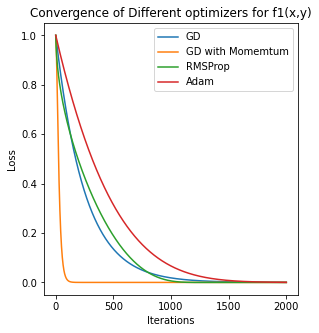

In [4]:

fig = plt.figure(1,figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(range(1, len(gd_func)+1), gd_func, label = "GD")
plt.plot(range(1, len(gd_momentum_func)+1), gd_momentum_func, label = "GD with Momemtum")
plt.plot(range(1, len(rmsprop_func)+1), rmsprop_func, label = "RMSProp")
plt.plot(range(1, len(adam_func)+1), adam_func, label = "Adam")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Convergence of Different optimizers for f1(x,y)')
plt.legend()
plt.show()


In [5]:
def f2_variables():
    x = torch.Tensor([math.sqrt(2)])
    x.requires_grad=True
    y = torch.Tensor([0])
    y.requires_grad=True
    
    return x, y


x, y = f2_variables()
gd = optim.SGD([x, y], lr=lr)
gd_func = optim_func(x, y, f2, gd, title='GD')

x, y = f2_variables()
gd_momentum = optim.SGD([x, y], lr=lr, momentum=0.9)
gd_momentum_func = optim_func(x, y, f2, gd_momentum, title='GD momentum')

x, y = f2_variables()
rmsprop = optim.RMSprop([x, y], lr=lr)
rmsprop_func = optim_func(x, y, f2, rmsprop, title='RMSProp')

x, y = f2_variables()
adam = optim.Adam([x, y], lr=lr, betas=(0.9, 0.999))
adam_func = optim_func(x, y, f2, adam, title='Adam')

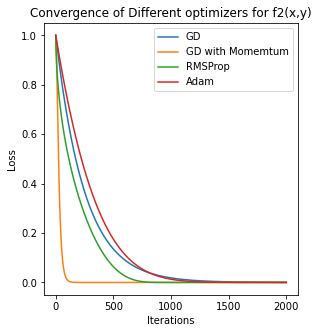

In [6]:
fig = plt.figure(1,figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(range(1, len(gd_func)+1), gd_func, label = "GD")
plt.plot(range(1, len(gd_momentum_func)+1), gd_momentum_func, label = "GD with Momemtum")
plt.plot(range(1, len(rmsprop_func)+1), rmsprop_func, label = "RMSProp")
plt.plot(range(1, len(adam_func)+1), adam_func, label = "Adam")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Convergence of Different optimizers for f2(x,y)')
plt.legend()
plt.show()